In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# load dataset

df = pd.read_csv("datasets/out.csv")

In [3]:
df.head()

,Al,Si,P,S,K,Ca,Ti,Cr,Mn,Fe,...,Sr,Zr,Nb,Cd,Cd.1,Sn,Sn.1,Pb,Pb.1,Site
0,4333,68371,3427,1,1,2971,128474,3101,15203,1380372,...,5591,80270,3015,3358,7597,1581,1602,3427,1444,1
1,4509,79921,2144,1,1,7400,145128,5905,17946,1018834,...,7980,53726,5256,3626,8640,1166,3040,4639,1361,1
2,3257,77313,2163,1,1,3336,156075,4016,10261,860063,...,6697,50673,4056,4130,8514,2148,2110,4943,1090,1
3,4548,66791,1830,1,1,1578,117219,4256,24173,776013,...,4606,46664,2760,4172,9677,1996,1663,4062,1382,1
4,3087,92876,1730,1,1,24,118097,2308,24020,827513,...,4145,89797,3329,4015,9865,1752,1327,5393,1265,1


In [4]:
#split dataset in features and target variable
feature_cols = ['Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe',
       'Ni', 'Cu', 'Zn', 'Br', 'Sr', 'Zr', 'Nb', 'Cd', 'Cd.1', 'Sn', 'Sn.1',
       'Pb', 'Pb.1']
X = df[feature_cols] # Features
y = df.Site # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9032258064516129


## This model show a significant bias due to being a smaller data set.

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.86      1.00      0.92        12
           3       1.00      0.40      0.57         5

    accuracy                           0.90        31
   macro avg       0.93      0.80      0.82        31
weighted avg       0.91      0.90      0.89        31



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


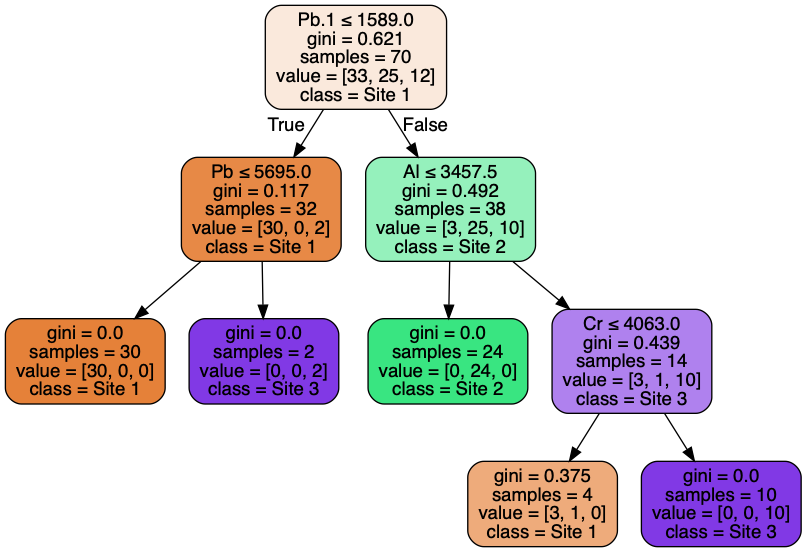

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Site 1','Site 2','Site 3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('sites.png')
Image(graph.create_png())